In [1]:
import numpy as np
from scipy import integrate
import torch

import matplotlib
import matplotlib.pyplot as plt

0.36791950647965144


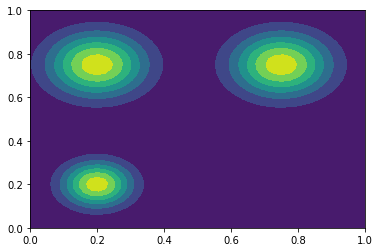

In [2]:
from probability_distribution import mu_gaussians, mu_display2D
U_shape = (1,1)
p1 = mu_gaussians([(0.2, 0.01), (0.75, 0.02), (np.array([0.2, 0.75]), 0.02)], U_shape)
print(p1(np.array([0.2,0.3])))
mu_display2D(p1, U_shape)


In [3]:
from fourier_functions import Fourier_Functions, Fourier_Functions_Visualize2D

mu = p1
K = 3
ff = Fourier_Functions(mu, U_shape, K, printProgress=True)
# for k in ff:
#     Fourier_Functions_Visualize2D(U_shape, ff[k])


Fourier Functions (mu, U_shape= (1, 1) , K= 3 )...
Computing constants (new_k, h_k, lambda_k)...
Computing torch fourier functions (f_k, df_k)...
Computing mu fourier coefficients (mu_k)... this will take a while because integration...


In [ ]:
from mm_agent import MMAgent1
from global_comm_agent_system import GlobalCommunicationSystem
from ergodic_agents import Agent, AgentSystem
# can only really test init rn
n = len(U_shape)
all_k = list(np.ndindex(*[K]*n))
agent1 = MMAgent1(0, np.array([0.2, 0.3]), 0.2, all_k, U_shape, ff, eps=1e-5)
for k in agent1.k_bands:
    print("mu"+str(k)+": ", ff[k]["mu_k"])
print("agent1 kbands: ", agent1.k_bands)
print("agent1 ck: ", agent1.get_c_k_log())
print("agent1 ergodicity: ", agent1.get_ergodicity_log())
print("agent1 position: ", agent1.get_position_log())
agent2 = MMAgent1(1, np.array([0.6, 0.5]), 0.2, all_k, U_shape, ff, eps=1e-5)
print(agent2.get_c_k_log())
print(agent2.get_ergodicity_log())
print(agent2.get_position_log())
print("system")
system1 = AgentSystem([agent1, agent2], mu, U_shape, ff, K)
print("system k_bands: ", list(system1.all_k_bands))
print("system c_k: ", system1.get_c_k_log())
print("system ergodicity: ", system1.get_ergodicity_log())

mu(0, 0):  0.1543442209624029
mu(0, 1):  -0.08192132336295474
mu(0, 2):  0.011260548433379342
mu(1, 0):  0.042007440083285885
mu(1, 1):  0.032151150968839505
mu(1, 2):  0.013669428472842832
mu(2, 0):  0.032267693514379026
mu(2, 1):  -0.00521271716951493
mu(2, 2):  0.004674646978975583
agent1 kbands:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
agent1 ck:  [{(0, 0): array(1.), (0, 1): array(0.83125388), (0, 2): array(-0.43701602), (1, 0): array(1.14412281), (1, 1): array(0.95105652), (1, 2): array(-0.5), (2, 0): array(0.43701602), (2, 1): array(0.36327126), (2, 2): array(-0.19098301)}]
agent1 ergodicity:  [0.78382698]
agent1 position:  [[0.2 0.3]]
[{(0, 0): array(1.), (0, 1): array(8.65956056e-17), (0, 2): array(-1.41421356), (1, 0): array(-0.43701602), (1, 1): array(-3.78436673e-17), (1, 2): array(0.61803399), (2, 0): array(-1.14412281), (2, 1): array(-9.90760073e-17), (2, 2): array(1.61803399)}]
[0.73966193]
[[0.6 0.5]]
system
system k_bands:  [(0, 0), (0,

In [ ]:
# #manually set some stuff
# system1.e_log = [5,4,3,2,1]
# x = np.array([0.2,0.3])
# agent1.x_log = [x, x+np.array([0.1,0]), x+0.1, x+np.array([0.1,0.2]), x+0.2]
# agent1.e_log = [4,3.5,3,2.5,2]
# y = np.array([0.4,0.5])
# agent2.x_log = [y, y+np.array([0.1,0]), y+0.1, y+np.array([0.1,0.2]), y+0.2]
# agent2.e_log = [6,5.5,5,4.5,4]
# system1.all_k_bands = all_k
# for i in range(5):
#     system1.c_k_log.append({})
#     for k in system1.all_k_bands:
#         system1.c_k_log[i][k] = system1.c_k_log[max(0,i-1)][k]+0.1

In [ ]:
t = 0
delta_t = 0.1
for i in range(100):
    t = i * delta_t
    system1.evolve(t, delta_t)

0.0
0.1
None
None
None


TypeError: 'list' object cannot be interpreted as an integer

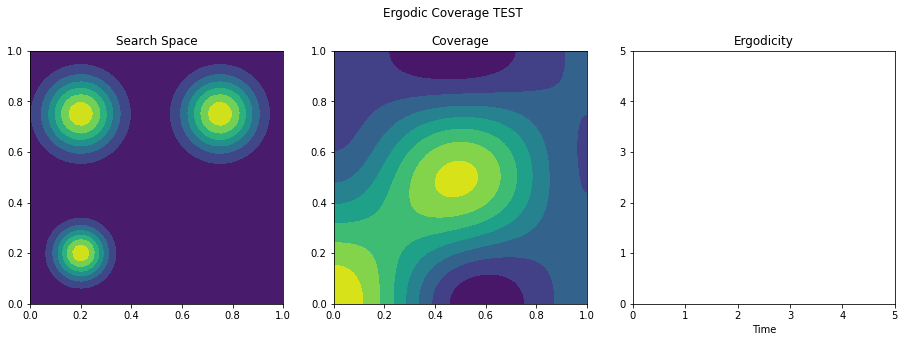

In [ ]:
system1.visualize2d(filename="test_c_k", additional_title="TEST", plot_c_k=True)

ValueError: too many values to unpack (expected 2)

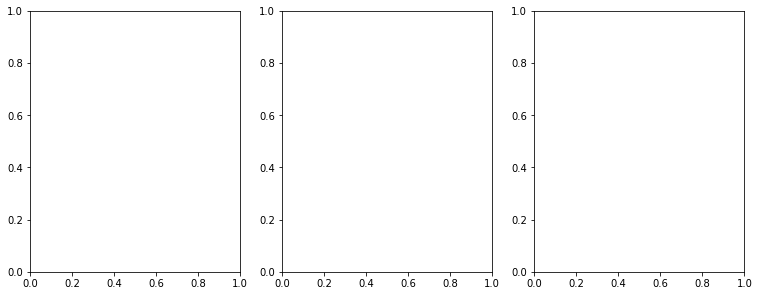

In [ ]:
system1.visualize2d(filename="test_without_c_k", additional_title="TEST", plot_c_k=False)